# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 32

**Author 1 (sciper):** Alexia Dormann (301997)  
**Author 2 (sciper):** Valgerdur Jónsdóttir (351819) 
**Author 3 (sciper):** Mariia Eremina (342236) 

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [5]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

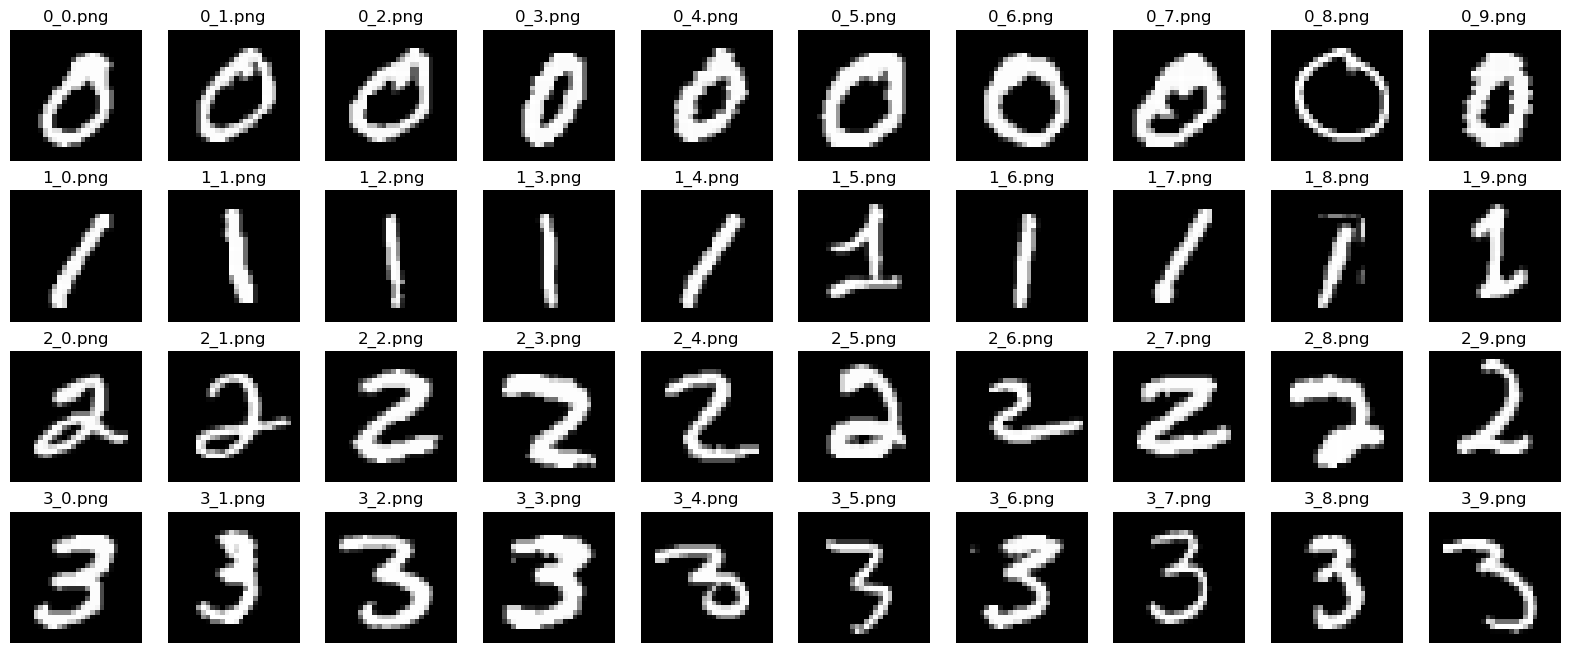

In [6]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

*1)* *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)

In [7]:
import cv2
from skimage.morphology import binary_closing, disk, square

def preprocess(images, digit, disk_size, square_width):
    '''
    Preprocesses the images by binarizing and applying morphology
    :param images: a list of images to be preprocessed
    :param digit: 0 or 1, the digit to be preprocessed
    :param disk_size: the size of the disk for morphology
    :param square_width: the width of the square for morphology
    :return: a list of preprocessed images
    '''
    # binarize images: convert to black and white
    binary = []
    for im in images:
        _, binarized = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY)
        binary.append(binarized)

    # apply morphology to clean
    if digit == 0:
        B = disk(disk_size)
        processed = []
        for im in binary:
            processed_im = binary_closing(im, B).astype('uint8') * 255
            processed.append(processed_im)
    if digit == 1:
        B = square(square_width)
        processed = []
        for im in binary:
            processed_im = binary_closing(im, B).astype('uint8') * 255
            processed.append(processed_im)

    return processed

Let's visualize the preprocessing of our image:

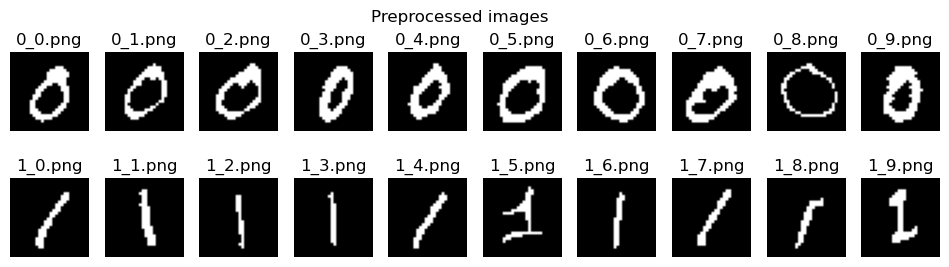

In [8]:
zeros = preprocess(zeros_im, 0, disk_size = 1, square_width = 3)
ones = preprocess(ones_im, 1, disk_size = 1, square_width = 3)

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

We started by defining a function that preprocesses the images by binarizing using thresholding and applying morphology afterwards, in particular we apply closing to “close” up (dark) gaps between (bright) features. We then applied this function to the images of the digits 0 and 1. From the results, we can see that the preprocessing has been successful. Both the 0's and 1's are now clearly distinguishable from the background, and the edges of the digits are clearly visible. There are also not any gaps big gaps in each of the digits.

### 1.2. Get descriptors (4 pts)

*2)* *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)

In [89]:
import numpy as np
from scipy.fft import fft, ifft

def interpolation_contour(contours, N):
    """
    Interpolate contour to have N equi-distant points
    :param contours: a vector of contour points
    :param N: number of equi-distant points
    :return: N equi-distant contour coordinate points
    """
    contours = np.array(contours).squeeze()

    x,y = contours[:,0], contours[:,1]
    xd, yd = np.diff(x), np.diff(y)
    u = np.cumsum(np.sqrt(xd**2+yd**2))
    u = np.hstack([[0],u])

    t = np.linspace(0,u.max(),N+1)
    xn = np.interp(t, u, x)[:-1]
    yn = np.interp(t, u, y)[:-1]

    return np.array([xn,yn]).T

In [90]:
def get_descriptors(img, N = 100):
    """
    Function that takes as input an image and returns a set of descriptors.
    :param img: image to find Fourier descriptors of
    :param N: number of equi-distant points, used for interpolation
    :return: Fourier descriptors
    """
    # get contour, only keep outermost contour
    contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = interpolation_contour(contours, N)
    # each 2D contour sample interpreted as a point in the complex plane
    contour_complex = contours[:, 0] + 1j * contours[:, 1]
    # compute 1D Fourier transform
    descriptors = fft(contour_complex)
    return descriptors

# Check first 10 descriptors of a test image
print(get_descriptors(zeros[0], 30)[:10])

[421.72981481+445.10825638j  32.83988935 -38.01152255j
   1.42057118 -12.4096431j    2.94214262  -2.05009951j
  -0.57734662  +2.34516012j  -0.99067918  +2.80311527j
  -1.965216    +2.69939813j  -0.8554105   +0.90261869j
  -0.54579044  +0.57982486j   0.68203857  -1.44629926j]


#### Discussion

To make the Fourier descriptors comparable between different images, we need the contours to be interpolated by a constant number of points. The signals should therefore have the same number of time steps or the descriptors are not comparable. Therefore, we define the function `interpolation_contour` that takes as input a contour and the number of equi-distant points and returns the contour with the specified number of equi-distant points.
After obtaining $N$ contour coordinates $(x_k, y_k)$, $k \in \{1, 2, \ldots, N\}$, we can interpret each contour point as a point in the complex plane, i.e.,
\begin{equation}
z_k = x_k + iy_k
\end{equation}
with $x_k$ and $y_k$ taken as the real and imaginary part components, respectively. The Fourier descriptors are then obtained by computing the 1D Fourier transform of the complex contour points. This is done with the function `get_descriptors`. It is then possible to reconstruct the contour by computing the inverse Fourier transform of the Fourier descriptors.

### 1.3. Study effect of descriptors (6 pts)

*3)* *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ).
- Discuss about your findings. (**4 pts**)

In [54]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 50]

# Define images for which you will show the recovery of the contour
zero = zeros_im[5]
one = ones_im[5]

In [55]:
# get the descriptors for both imaged
zero_descriptors = get_descriptors(zero, 100)
one_descriptors = get_descriptors(one, 100)

zero_reconst, one_reconst = [],[]
for s in descr_set_sizes:
    # reconstruct the zero image using the first s descriptors
    zero_coeff = np.zeros_like(zero_descriptors)
    zero_coeff[:s] = zero_descriptors[:s] #positive freq
    zero_coeff[-s:] = zero_descriptors[-s:] #negative freq

    # inverse Fourier transform of the selected coeff
    contour_zero = ifft(zero_coeff)
    zero_reconst.append(contour_zero)
    
    # reconstruct the one image using the first s descriptors
    one_coeff = np.zeros_like(one_descriptors)
    one_coeff[:s] = one_descriptors[:s] #positive freq
    one_coeff[-s:] = one_descriptors[-s:] #negative freq

    # inverse fourier transform of the selected coeff
    contour_one  = ifft(one_coeff)
    one_reconst.append(contour_one)

# convert complex point into coordinates for plotting
zero_reconst = np.array([[x.real, x.imag] for x in zero_reconst])
one_reconst = np.array([[x.real, x.imag] for x in one_reconst])

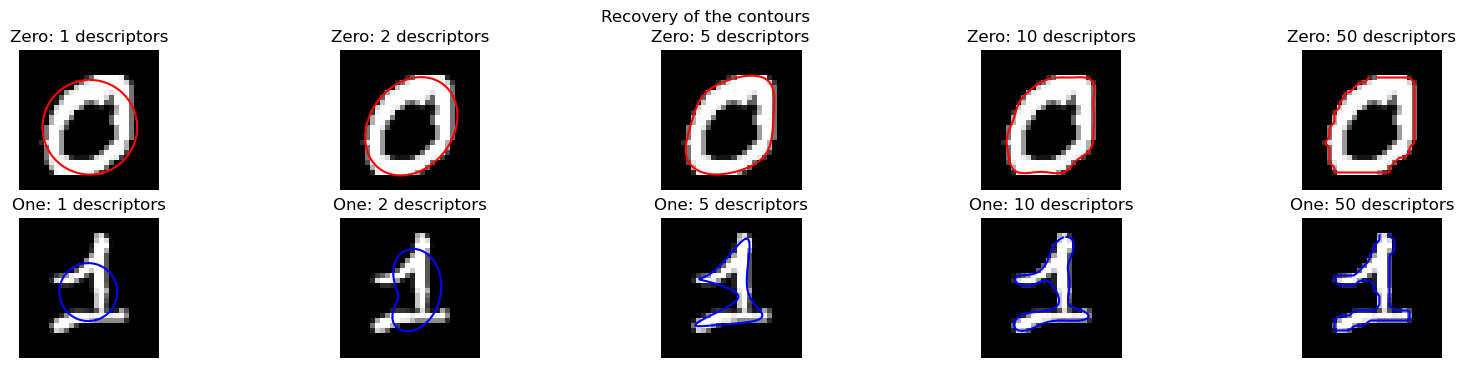

In [56]:
# On each of the 5 plots we will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").

fig, axes = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0,  5):
    axes[0,i].imshow(zero, cmap='gray')
    axes[0,i].plot(zero_reconst[i][0], zero_reconst[i][1], 'r')
    axes[0,i].axis('off')
    axes[0,i].set_title(f'Zero: {descr_set_sizes[i]} descriptors')
    
for i in range(0,  5):
    axes[1,i].imshow(one, cmap='gray')
    axes[1,i].plot(one_reconst[i][0], one_reconst[i][1], 'b')
    axes[1,i].axis('off')
    axes[1,i].set_title(f'One: {descr_set_sizes[i]} descriptors')
    
fig.suptitle("Recovery of the contours")
plt.show()

#### Discussion

In the image above, we can see initial image of the two digits being reconstructed as well as the red and blue contour that is obtained using the inverse Fourier transform of the Fourier descriptors. The first row in the plot shows the image of a "0" digit and the contour that is obtained using only the first Fourier descriptor. We see that the contour is not very accurate, but it is possible to recognize the digit. In the image of the "1" digit, the contour using the first Fourier descriptor is not recognizable at all, but the location of the digit is. As we increase the number of Fourier descriptors, the reconstruction of the contour becomes more accurate. The contour of the "0" digit is recognizable with only the first two Fourier descriptors, but the contour of the "1" digit is not. However, it is quite accurate using only a few descriptors, and the accuracy doesn't seem to improve that much from using 10 descriptors to 50 descriptors, as the contour is already quite recognizable using only 10. It is even accurate enough with only 5 descriptors, since the first descriptors contain the majority of the shape information of the digit.

### 1.4 Clustering (2 pts)

*4)* *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)

In [59]:
# get descriptors and compute amplitudes
zeros_des = [get_descriptors(im, 101) for im in zeros]
zeros_des = [np.abs(des) for des in zeros_des]

ones_des = [get_descriptors(im, 101) for im in ones]
ones_des = [np.abs(des) for des in ones_des]

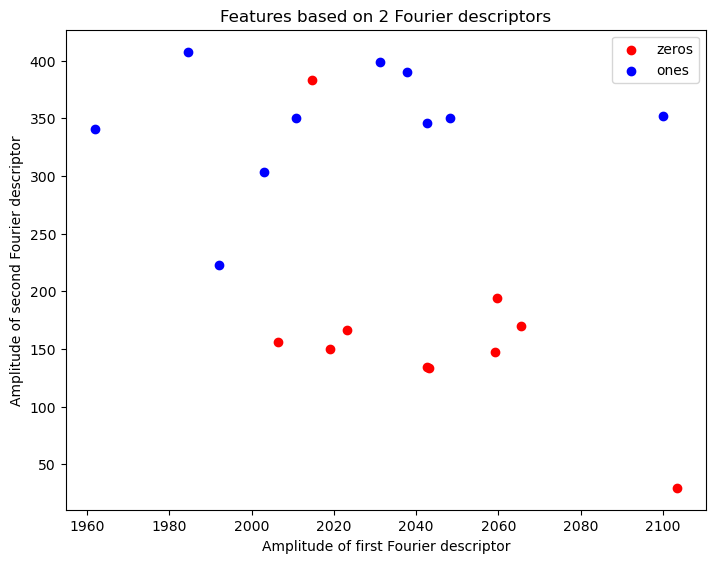

In [60]:
# First feature for all "0"s: amplitude of first Fourier descriptor
zeros_f1 = [des[0] for des in zeros_des]
# Second feature for all "0"s: amplitude of second Fourier descriptor
zeros_f2 = [des[1] for des in zeros_des]
# Fist feature for all "1"s: amplitude of first Fourier descriptor
ones_f1 = [des[0] for des in ones_des]
# Second feature for all "1"s: amplitude of second Fourier descriptor
ones_f2 = [des[1] for des in ones_des]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.xlabel("Amplitude of first Fourier descriptor")
plt.ylabel("Amplitude of second Fourier descriptor")
plt.show()

#### Discussion


Given that the first Fourier descriptors contain the majority of the shape information of the digit, we can use the amplitude of our first two Fourier descriptors as our feature vector. We plotted the amplitude of our first two Fourier descriptors for all the images containing a "0" or a "1", but we decided to use the amplitude of the descriptors instead of taking the real part of the descriptors as it yielded a better separation of the digits.

From the plot, we can see that the feature vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other, even though there is one zero-point that is not correctly classified. However, our clustering results are good enough and shows well how Fourier descriptors can be useful as features for classification. Also, since the energy is concentrated in the low frequency components, we can see that the amplitude of the first Fourier descriptor is much higher than the amplitude of the second Fourier descriptor, since the first Fourier descriptor contains the majority of the shape information of the digit.

### 1.5 Transformation invariance (6 pts)

*5)* *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

#### Preliminary discussion

Fourier descriptors in their basic form are not invariant under geometrical transformations, such as translation, rotation or scaling:
- Translation only affects the first Fourier descriptor as it encodes the mean of the object. The translation of an image affects the Fourier descriptors such that the fundamental frequency is shifted by the translation vector. This would influence the correct position of the image, but not the shape itself.
- The rotation of an image affects the Fourier descriptors such that the phase of all the descriptors is shifted by the same amount.
- The scaling of an image affects the Fourier descriptors such that the corresponding Fourier descriptors are scaled by the same factor.

Fourier descriptors are not directly insensitive to these geometrical changes, but the changes in the parameters are related to simple transformations on the descriptors. Therefore, we can use these transformations to make the Fourier descriptors invariant to these transformations.

Operations to make the Fourier descriptors invariant to:
- Translation: It is sufficient to discard the first Fourier descriptor, since it corresponds to the fundamental frequency, thereby shifting the shape's center to the origin of the coordinate system.
- Rotation: Only the phase of the Fourier descriptors is affected by rotation. We will therefore discard the phase of the Fourier descriptors.
- Scale: The ratio between the Fourier descriptors is invariant to scale. We will choose one descriptor as the reference and divide all the other descriptors by this reference descriptor, thereby making the shape invariant to scaling.

#### Implementation

We will now implement a function to make the Fourier descriptors invariant to translation, rotation and scale. We also implement functions that apply the transformations to the images, and we visualize the results of the transformations on the images of the digits "0" and "1".

In [62]:
def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    """
    Make the Fourier descriptors of an image invariant to rotation, translation and scale.
    :param img: image
    :param inv_to_rotation: boolean, if True, make the descriptors invariant to rotation
    :param inv_to_translation: boolean, if True, make the descriptors invariant to translation
    :param inv_to_scale: boolean, if True, make the descriptors invariant to scale
    :return: invariant descriptors
    """
    descriptors = get_descriptors(img)
    
    # translation: discard first component
    if inv_to_translation:
        descriptors = descriptors[1:]
        
    # rotation: only keep amplitudes
    if inv_to_rotation:
        descriptors = (2 / 100) * np.abs(descriptors)
    
    # scale: chose the fifth descriptor as reference and divide all by reference
    if inv_to_scale:
        descriptors = descriptors / np.abs(descriptors[5])
        
    return descriptors

In [186]:
from skimage.transform import rotate, rescale, AffineTransform, warp, SimilarityTransform

def random_rotate(img):
    """
    Custom rotation function.
    :param img: image
    :return: rotated image
    """
    angle = np.random.randint(360)
    rotated = rotate(img, angle, preserve_range=True)
    rotated = np.rint(rotated).astype(np.uint8) #make sure still correct range and type
    
    return rotated

def random_translate(img):
    """
    Custom translation function.
    :param img: image
    :return: translated image
    """
    x_translation, y_translation = np.random.randint(5, size=2)
    
    transform = AffineTransform(translation=[x_translation, y_translation])
    #shifted = warp(img, transform, mode='wrap', preserve_range=True)
    shifted = warp(img, transform, preserve_range=False)
    shifted = np.rint(shifted).astype(img.dtype)
    #shifted = shifted.astype(img.dtype)

    return shifted
    
def random_scale(img):
    """
    Custom scaling function.
    :param img: image
    :return: scaled image
    """
    scaling_factor = np.random.randint(1,100)
    rescaled = rescale(img, scaling_factor, preserve_range=True)
    rescaled = np.rint(rescaled).astype(np.uint8)
    
    return rescaled

In [187]:
# We will define 4 sets of new images below

# Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros =  [random_rotate(img) for img in zeros]
rotated_images_ones = [random_rotate(img) for img in ones]

# Apply only translation for each "0" and "1" and store results below
translated_images_zeros = [random_translate(img) for img in zeros]
translated_images_ones = [random_translate(img) for img in ones]

# Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = [random_scale(img) for img in zeros]
scaled_images_ones = [random_scale(img) for img in ones]

# Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = [random_translate(random_scale(random_rotate(img))) for img in zeros]
transformed_images_ones = [random_translate(random_scale(random_rotate(img))) for img in ones]

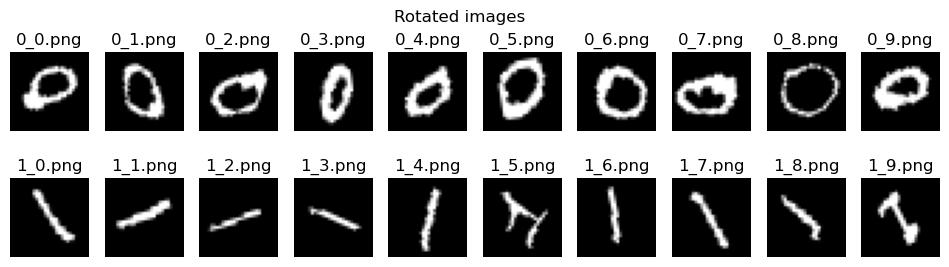

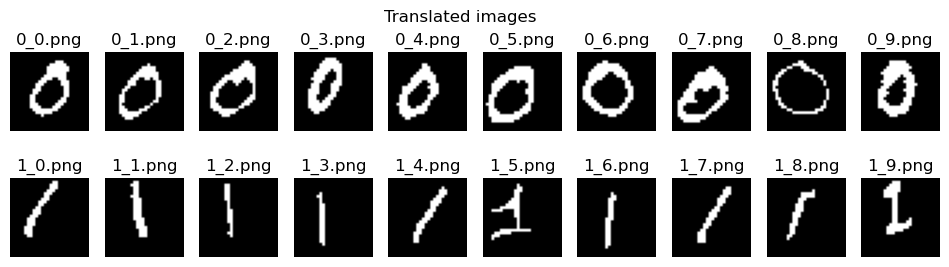

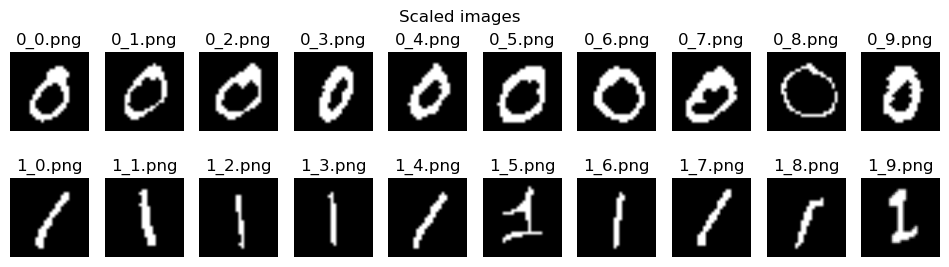

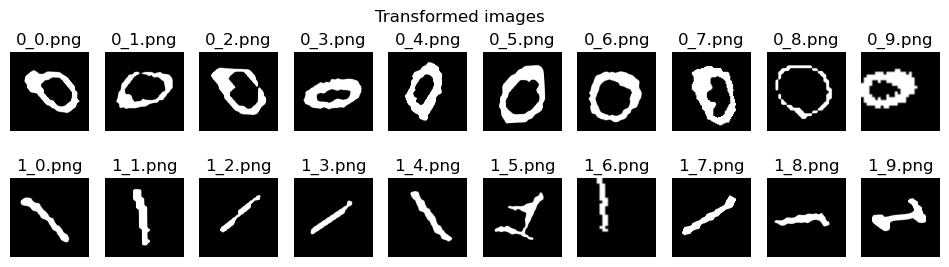

In [188]:
# Plot rotated images
fig, axes = plt.subplots(2, len(rotated_images_zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], rotated_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], rotated_images_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Rotated images")
plt.show()

# Plot translated images
fig, axes = plt.subplots(2, len(translated_images_zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], translated_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], translated_images_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Translated images")
plt.show()

# Plot scaled images
fig, axes = plt.subplots(2, len(scaled_images_zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], scaled_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], scaled_images_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Scaled images")
plt.show()

# Plot transformed images
fig, axes = plt.subplots(2, len(transformed_images_zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], transformed_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], transformed_images_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Transformed images")
plt.show()

Now, we define a function that, given Fourier descriptors of a sets of images, computes the amplitude of them and defines a 2-dimensional feature vector with the amplitude of the first two Fourier descriptors. We will use this function to plot clusters of "0"s and "1"s Fourier descriptors invariant to the geometrical transformation being applied to the images, i.e., invariant to rotation, translation, scaling and all three transformations together.

In [134]:
def plot_clusters(zeros_descriptors, ones_descriptors, transformation):
    """
    Plot clusters of descriptors.
    :param zeros_descriptors: Fourier descriptors of zeros
    :param ones_descriptors: Fourier descriptors of ones
    :param transformation: string, transformation applied to images
    :return: plot
    """
    zeros_des = [np.abs(des) for des in zeros_descriptors]
    ones_des = [np.abs(des) for des in ones_descriptors]

    zeros_f1 = [des[0] for des in zeros_des]
    zeros_f2 = [des[1] for des in zeros_des]
    ones_f1 = [des[0] for des in ones_des]
    ones_f2 = [des[1] for des in ones_des]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
    ax.scatter(ones_f1, ones_f2, color='b', label='ones')
    ax.legend(loc='best')
    plt.title(f"Features based on 2 Fourier descriptors invariant to {transformation}")
    plt.xlabel("Amplitude of first Fourier descriptor")
    plt.ylabel("Amplitude of second Fourier descriptor")
    plt.show()

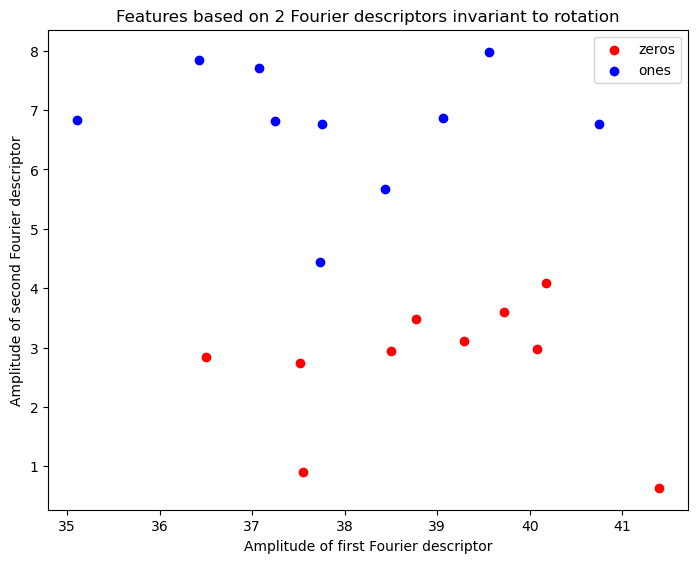

In [146]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invariant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!

# find features invariant to rotation
rotated_zeros_descriptors = [get_invariant_features(img, inv_to_rotation=True) for img in rotated_images_zeros]
rotated_ones_descriptors = [get_invariant_features(img, inv_to_rotation=True) for img in rotated_images_ones]
plot_clusters(rotated_zeros_descriptors, rotated_ones_descriptors, "rotation")

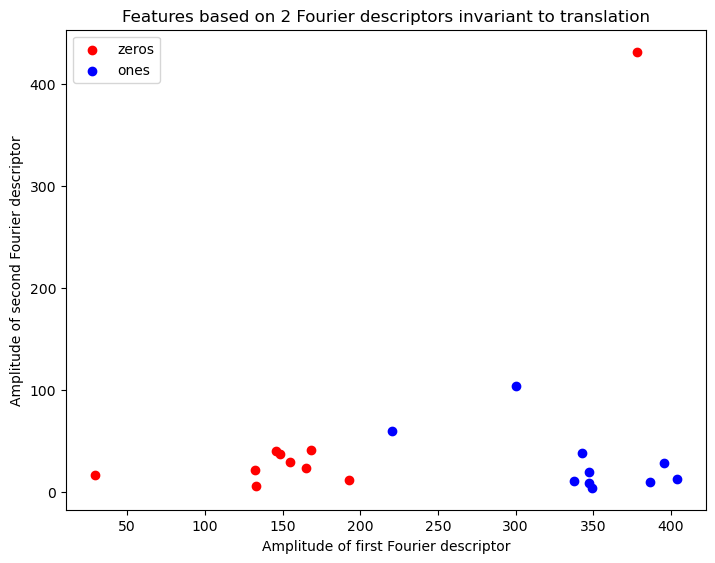

In [176]:
# get features invariant to translation
translated_zeros_descriptors = [get_invariant_features(img, inv_to_translation=True) for img in translated_images_zeros]
translated_ones_descriptors = [get_invariant_features(img, inv_to_translation=True) for img in translated_images_ones]
plot_clusters(translated_zeros_descriptors, translated_ones_descriptors, "translation")

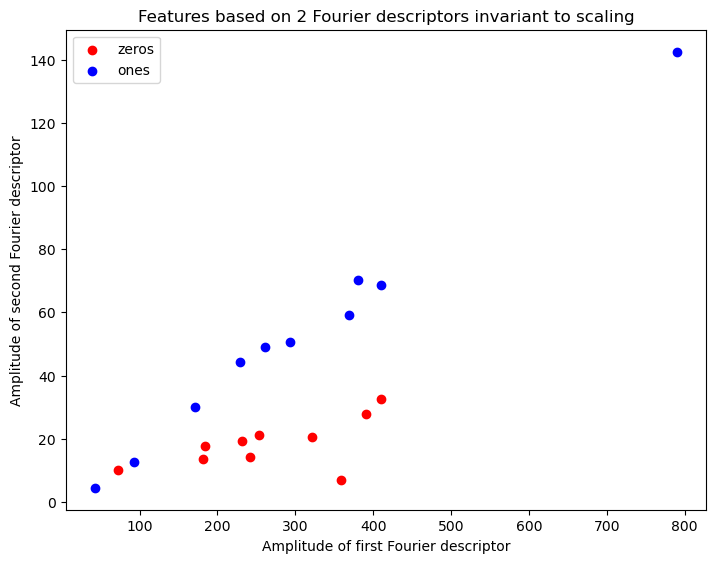

In [160]:
# get features invariant to scaling
scaled_zeros_descriptors = [get_invariant_features(img, inv_to_scale=True) for img in scaled_images_zeros]
scaled_ones_descriptors = [get_invariant_features(img, inv_to_scale=True) for img in scaled_images_ones]
plot_clusters(scaled_zeros_descriptors, scaled_ones_descriptors, "scaling")

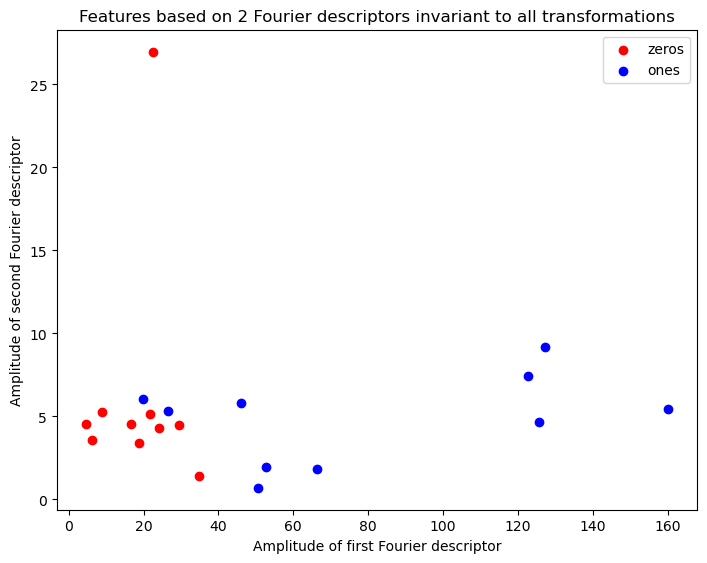

In [189]:
# get features invariant to every transformation
transformed_zeros_descriptors = [get_invariant_features(img, inv_to_rotation=True, inv_to_translation=True, inv_to_scale=True) for img in transformed_images_zeros]
transformed_ones_descriptors = [get_invariant_features(img, inv_to_rotation=True, inv_to_translation=True, inv_to_scale=True) for img in transformed_images_ones]
plot_clusters(transformed_zeros_descriptors, transformed_ones_descriptors, "all transformations")

#### Discussion

We see that even after applying the geometrical transformations to the images, we are still able to distinguish between the digits using the Fourier decriptors, after making them invariant to the transformations. Therefore, we conclude that the operations to make the Fourier descriptors invariant for each transformation, which were described above, worked sufficiently well. We note however, that the there appears to be a slight overlap between the clusters of the "0"s and "1"s, especially in the last plot, where the images were transformed by all the transformations.

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.1. Cluster on compacity (6 pts)

*1)* *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

In [198]:
# Preproccess: Binarize image
twos = []
for im in twos_im:
    _, binary = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY)
    twos.append((binary==255).astype(int))
    
threes = []
for im in threes_im:
    _, binary = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY)
    threes.append((binary==255).astype(int))

Let's visulize the images after preprocessing:

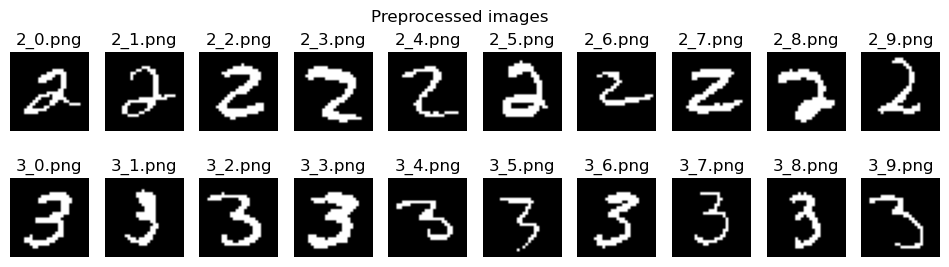

In [199]:
# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

Now, we will compute the perimeter and area of each image, and print the average values for each digit:

In [193]:
from skimage.measure import perimeter

#Compute perimeters of "2" and "3" images
perimeters_2, perimeters_3 = [], []
for im in twos:
    perimeters_2.append(perimeter(im))
for im in threes:
    perimeters_3.append(perimeter(im))
    
print('Average perimeter for "2" images:', np.mean(perimeters_2))
print('Average perimeter for "3" images:', np.mean(perimeters_3))

#Compute area of "2" and "3" images , get number non zero image of binary image
area_2, area_3 = [], []
for im in twos:
    area_2.append(np.sum(im))
    
for im in threes:
    area_3.append(np.sum(im))
    
print('Average area for "2" images:', np.mean(area_2))
print('Average area for "3" images:', np.mean(area_3))

Average perimeter for "2" images: 76.81736649163068
Average perimeter for "3" images: 67.52975105768083
Average area for "2" images: 105.2
Average area for "3" images: 89.9


By setting the perimeter and area as features, we can plot the features for each digit:

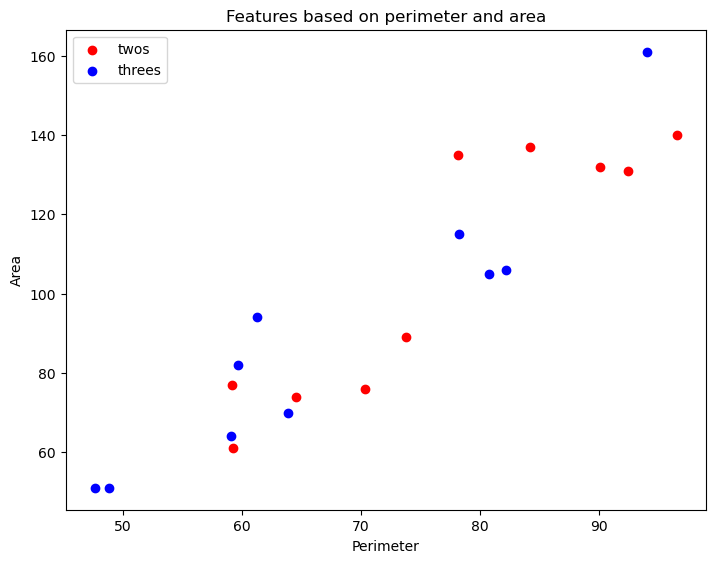

In [196]:
# We fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = perimeters_2
twos_f2 = area_2
threes_f1 = perimeters_3
threes_f2 = area_3

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.xlabel("Perimeter")
plt.ylabel("Area")
plt.show()

We see that the features are not well separated, and therefore, it is difficult to distinguish between the digits. We will now compute the compacity of each image, which is given with the formula
\begin{equation*}
C = \frac{P^2}{A}
\end{equation*}
where $P$ is the perimeter, and $A$ is the area. Then we will use the compacity as a feature for the digits and plot it in the same way as before:

/var/folders/xq/wkz5506d4vl23w8pv1zy5ysw0000gn/T/ipykernel_15859/4285295112.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(compacity_2, 'bo', color='r', label='twos')
/var/folders/xq/wkz5506d4vl23w8pv1zy5ysw0000gn/T/ipykernel_15859/4285295112.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(compacity_3, 'bo', color='b', label='threes')


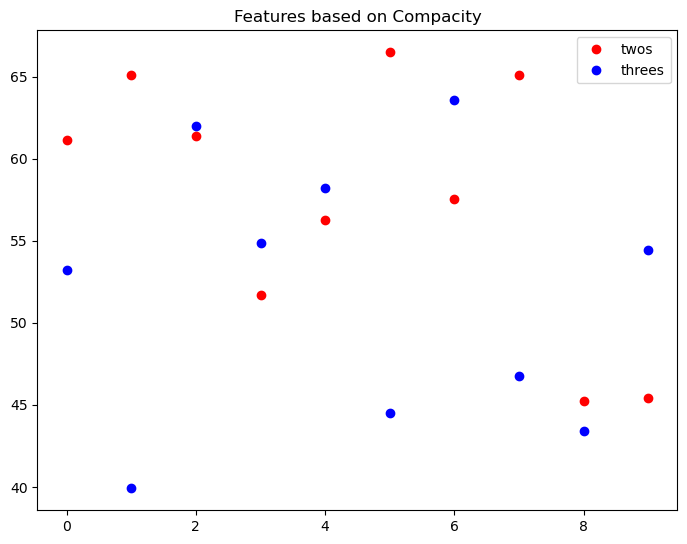

In [197]:
# Make the 1D plot of the compacity

#Compute compacity
compacity_2 = (np.array(perimeters_2)*np.array(perimeters_2))/np.array(area_2)
compacity_3 = (np.array(perimeters_3)*np.array(perimeters_3))/np.array(area_3)

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(compacity_2, 'bo', color='r', label='twos')
ax.plot(compacity_3, 'bo', color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on Compacity")
plt.show()


####  Discussion

We see that using the compacity of the digits it is difficult to distingh them on the plots. By computing the mean area and perimeter of the two and three digits, we see that the areas and peremeters of twos are in average bigger than for the threes. However, as mentioned, it appears that these features are too variable, therefore, they are unfortunatly not very good predictors of the digit class. Moreover, the compacity that is computed from the area and perimeter is also not a good discriminator. 

Note that compacity is invariant to translation, rotation, scaling.

### 2.2. Additional method (4 pts)

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

We will use the eigenvalues of the inertia axes as the features to cluster the images. As seen during the lecture, the eigenvalues are a measure of the variance of the shape projected on the axes of inertia.

In [ ]:
from skimage.measure import inertia_tensor_eigvals

inertia_eig_2 = [inertia_tensor_eigvals(img) for img in twos]
inertia_eig_3 = [inertia_tensor_eigvals(img) for img in threes]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.array(inertia_eig_2)[:,0], np.array(inertia_eig_2)[:,1], 'bo', color='r', label='twos')
ax.plot(np.array(inertia_eig_3)[:,0], np.array(inertia_eig_3)[:,1], 'bo', color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on inertia eigenvalues")
plt.show()

#### Discussion

Contrarly to the compacity, this new features are able to distinguish between the two digits class fairly well as one can see on the above graph. Intiutivly this seems correct as the eigenvalues of the axes of inertia represent the variance of the shape projected on the axe of inertia. Obviously, threes tend to be more stretch out in one axis than in the other, whereas, twos are stretched in both directions.